In [299]:
# Packages

import numpy as np
import scipy
import scipy.spatial
from scipy.spatial import distance_matrix

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [318]:
# Custom Variables

groups = 3
randomPointsInEveryGroup = 15

In [319]:
# The program calculates necessary variables

scatters = randomPointsInEveryGroup * 4
indexes = np.arange(scatters)
np.random.shuffle(indexes)
indexes = indexes[:groups]

In [320]:
# Making random points

a1_x = np.random.uniform(3,17,randomPointsInEveryGroup)
a1_y = np.random.uniform(3,17,randomPointsInEveryGroup)
a2_x = np.random.uniform(0,13,randomPointsInEveryGroup)
a2_y = np.random.uniform(0,13,randomPointsInEveryGroup)
a3_x = np.random.uniform(7,20,randomPointsInEveryGroup)
a3_y = np.random.uniform(7,20,randomPointsInEveryGroup)
r4_x = np.random.uniform(0,20,randomPointsInEveryGroup)
r4_y = np.random.uniform(0,20,randomPointsInEveryGroup)

a_x = np.r_[a1_x, a2_x, a3_x, r4_x].reshape(-1,1)
a_y = np.r_[a1_y, a2_y, a3_y, r4_y].reshape(-1,1)
points = np.hstack((a_x, a_y))

In [321]:
# Logic finding central points & lines

# Initial calculation
distances = scipy.spatial.distance_matrix(points, points)

linkLines = np.array([])        
for x in range(scatters):
    i = indexes[np.argmin(distances[x][indexes])]
    linkLines = np.append(linkLines, np.r_[points[x], points[i]])
linkLines = linkLines.reshape(-1, 4)

centres = np.array([])
for i in indexes:
    group = linkLines[np.where(linkLines[:,2] == points[i][0])]
    centres = np.append(centres, group.mean(0))
centres = centres.reshape(-1,4)

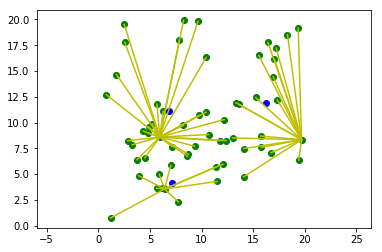

In [322]:
# Plotting task

plt.plot(a_x, a_y, 'go')
plt.plot(centres[:,0], centres[:,1], 'bo')

plt.plot(np.r_[linkLines[:,0], linkLines[:,2]].reshape(-1,scatters),
         np.r_[linkLines[:,1], linkLines[:,3]].reshape(-1,scatters), 'y-')

plt.axis('equal')
plt.show()

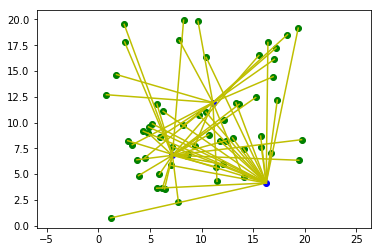

In [325]:
doIterate = True

while (doIterate):
    
    groupsCentres = np.hstack((centres[:,0], centres[:,1])).reshape(-1,2)
    distances2 = scipy.spatial.distance_matrix(points, groupsCentres).reshape(groups, -1).transpose()
    
    linkLines2 = np.array([])
    for x in range(len(distances2)):
        i = np.argmin(distances2[x])
        linkLines2 = np.append(linkLines2, np.r_[points[x], groupsCentres[i]])
    linkLines2 = linkLines2.reshape(-1, 4)
    
    centres2 = np.array([])
    for i in range(len(groupsCentres)):
        group = linkLines2[np.where(linkLines2[:,2] == groupsCentres[i][0])]
        centres2 = np.append(centres2, group.mean(0))
    centres2 = centres2.reshape(-1,4)
    
    doIterate = False

# Plotting task

plt.plot(a_x, a_y, 'go')
plt.plot(groupsCentres[:,0], groupsCentres[:,1], 'bo')

plt.plot(np.r_[linkLines2[:,0], linkLines2[:,2]].reshape(-1,scatters),
         np.r_[linkLines2[:,1], linkLines2[:,3]].reshape(-1,scatters), 'y-')

plt.axis('equal')
plt.show()

In [155]:
# print(points)
distances = scipy.spatial.distance_matrix([[1,2],[3,4]], [[1,2],[3,4]])
print(distances)

[[ 0.          2.82842712]
 [ 2.82842712  0.        ]]


In [171]:
np.array([1, 2]) * np.ones((3,2))

array([[ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.]])